# Енкрипција и декрипција со метод на супституција

## Енкрипција

- Ископирав текст од Википедија, го зачував во .txt file.
- Го форматирав текстот да биде напишан само со големи букви, да ги содржи само буквите од азбуката без дополнителни симболи, во исто време и ги споив сите зборови заедно.
- Генерирав рандом листа на бројки од 0 до 31, тоа се буквите само што се нумерирани
- Направив мапа која покажува од секоја буква до секоја буква, според рандом генерираната листа. Ова е клучот на Алис.
- Потоа одев една по една буква и ги претварав според клучот. 

In [14]:
import random


def encrypt_text(text, key):
    print(key)
    print()
    encrypted_text = [''] * len(text)
    for i, letter in enumerate(text):
        encrypted_text[i] = key[letter]

    encrypted_text = "".join(encrypted_text)
    # test
    print(encrypted_text)
    encrypted_file = open("encrypted_alice.txt", "w")
    encrypted_file.write(encrypted_text)
    encrypted_file.close()


if __name__ == "__main__":
    text = "alice.txt"
    alphabet = ['А', 'Б', 'В', 'Г', 'Д', 'Ѓ', 'Е', 'Ж', 'З', 'Ѕ', 'И', 'Ј', 'К', 'Л', 'Љ', 'М', 'Н', 'Њ', 'О', 'П', 'Р', 'С', 'Т', 'Ќ', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Џ', 'Ш']

    alice_file = open(text, "r")
    content = alice_file.read().upper()
    alice_file.close()

    clean_text = "".join([ a for a in content if a in alphabet ])
    substitution = random.sample(list(range(0,31)), 31)
    encryption_key = {}
    for i in range(0,31):
        encryption_key[alphabet[i]] = alphabet[substitution[i]]

    # encrypt_text(clean_text, encryption_key)

    ## test
    encrypt_text("МИЛЕНА", encryption_key)


{'А': 'Р', 'Б': 'Д', 'В': 'Ј', 'Г': 'Х', 'Д': 'Н', 'Ѓ': 'Ж', 'Е': 'Љ', 'Ж': 'Ф', 'З': 'Ч', 'Ѕ': 'А', 'И': 'Л', 'Ј': 'Г', 'К': 'Њ', 'Л': 'М', 'Љ': 'О', 'М': 'В', 'Н': 'У', 'Њ': 'К', 'О': 'Џ', 'П': 'Е', 'Р': 'Ѕ', 'С': 'Ќ', 'Т': 'П', 'Ќ': 'З', 'У': 'Ц', 'Ф': 'Ш', 'Х': 'Б', 'Ц': 'С', 'Ч': 'Т', 'Џ': 'И', 'Ш': 'Ѓ'}

ВЛМЉУР


## Декрипција

Познатите букви ги претставив со мали букви, а сеуште не познатите со големи букви.

In [23]:
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Од книгата ги земав табелите за фрекфенциската дистрибуција на букви, диграми и триграми и ги претворив во .csv file. (со помош на ChatGPT)

Ги избројав појавувањата на секоја буква, и после ги пресметав во проценти.

In [18]:
def find_frequency(count: dict):
    for letter in count.keys():
        count[letter] = (count[letter] / len(text)) * 100
    return count

In [17]:
def sort_dictionary(dictionary):
    sorted_freq = {}
    for key in sorted(dictionary, key=dictionary.get, reverse=True):
        sorted_freq[key] = dictionary[key]
    return sorted_freq

In [ ]:
def find_letter_frequency(text):
    letter_count = {}
    for _, letter in enumerate(text):
        if letter in letter_count.keys():
            letter_count[letter] += 1
        else:
            letter_count[letter] = 1
    return find_frequency(sort_dictionary(letter_count)) # there is one extra letter

Истото го направив и со биграмите.

In [19]:
def find_bigram_frequency(text):
    bigrams = {}
    previous_letter = ""
    for next_letter in text:
        bigram = f"{previous_letter}{next_letter}"
        previous_letter = next_letter
        if bigram in bigrams.keys():
            bigrams[bigram] += 1
        else:
            bigrams[bigram] = 1
    return sort_dictionary(find_frequency(bigrams))

Ги избројав и триграмите

In [21]:
def find_trigram_frequency(text):
    trigrams = {}
    i = 2
    while i < len(text):
        first_letter = text[i-2]
        middle_letter = text[i-1]
        last_letter = text[i]
        trigram = f"{first_letter}{middle_letter}{last_letter}"
        if trigram in trigrams.keys():
            trigrams[trigram] += 1
        else:
            trigrams[trigram] = 1
        i += 1
    return sort_dictionary(find_frequency(trigrams))

Првично идеата ми беше да ги земам првите 7 букви што најчесто се појавуваат во шифрираниот текст и да ги заменам со првите 7 букви општо. Пробав да дешифрирам ама резултатот беше лош. Не се разбираше ништо, идеата ми беше премногу едноставна. Со помош на визуелизација можам да направам полесна споредба на вредностите и со тоа да ги изберам правилните букви.

### Визуелизација на податоците

In [22]:
def plot_bars(standard_freq_file, local_freq_file):
    df1 = pd.read_csv(standard_freq_file)
    df2 = pd.read_csv(local_freq_file)
    if len(df1["letter"]) > len(df2["letter"]):
        x = np.arange(len(df1["letter"]))
    else:
        x = np.arange(len(df2["letter"]))
    width = 0.4
    plt.figure(figsize=(15,10))
    plt.bar(x - width/2, df1["frequency"], width, color='salmon')
    plt.bar(x + width/2, df2["frequency"], width, color='skyblue')

    # Add values on top of the bars
    for i, v in enumerate(zip(df1["frequency"], df2["frequency"])):
        plt.text(i - width/2, v[0] + 0.2, f"{v[0]:.3f} = {df1['letter'][i]}", ha='center', fontsize=12, rotation=90, color="red")
        plt.text(i + width/2, v[1] + 0.2, f"{v[1]:.3f} = {df2['letter'][i]}", ha='center', fontsize=12, rotation=90, color="blue")

    
    plt.show()

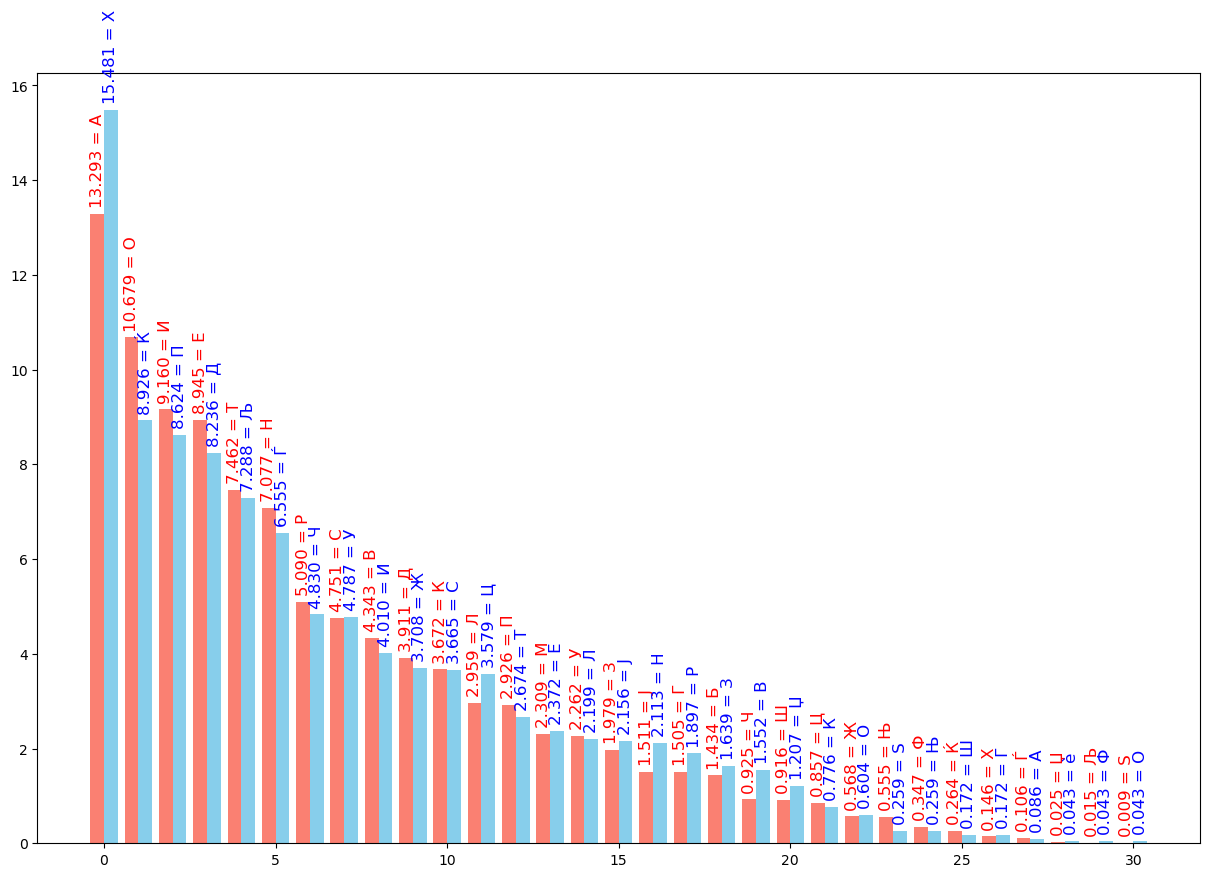

In [28]:
# salmon - Frequency distribution of letters, bigrams, trigrams in the Macedonian language
# blue - Frequency distribution of letters, bigrams, trigrams in the encrypted message
plot_bars("letter.csv", "letter_text.csv")

За една буква дадов опсег на можни вредности. Направив мапа која што ќе замени неколку од буквите во мојот текст со буквите од основното множество кои што имаат слична вредност на фрекфенција. Разликата на фрекфенција на заменета буква отприлика гледав да е со апсолутна разлика од 0.3 до 0.6 од фрекфенцијата на шифрираната буква.

Одбрав неколку букви кои што имаа поуникатни вредности. Откога направив некое мало множество на букви пробав да го дешифрирам текстот и да ги видам резултатите. Резултатите беа лоши. Сеуште ништо не се читаше.

Одлучив дека ми требаат уште информации, па ги инкорпорирав информациите од фрекфенциите од биграмите од основното множество. 

In [25]:
def bar_plot(df, color):
    plt.figure(figsize=(15,3))
    plt.bar(df["letter"], df["frequency"], color=color)
    for i, v in enumerate(df["frequency"]):
        plt.text(i, v, f"   {v:.3f} = {df['letter'][i]}", ha='center', fontsize=12, rotation=90, color=color)

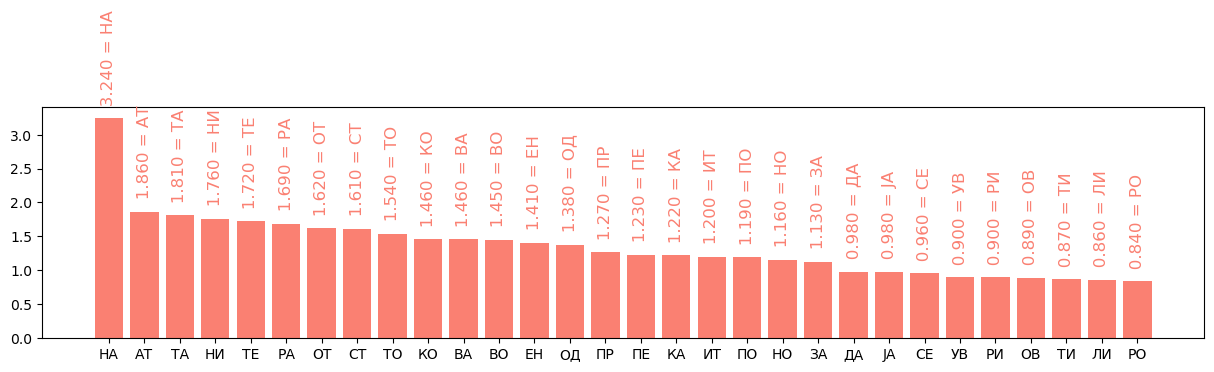

In [5]:
df = pd.read_csv("bigrams.csv")
bar_plot(df, "salmon")

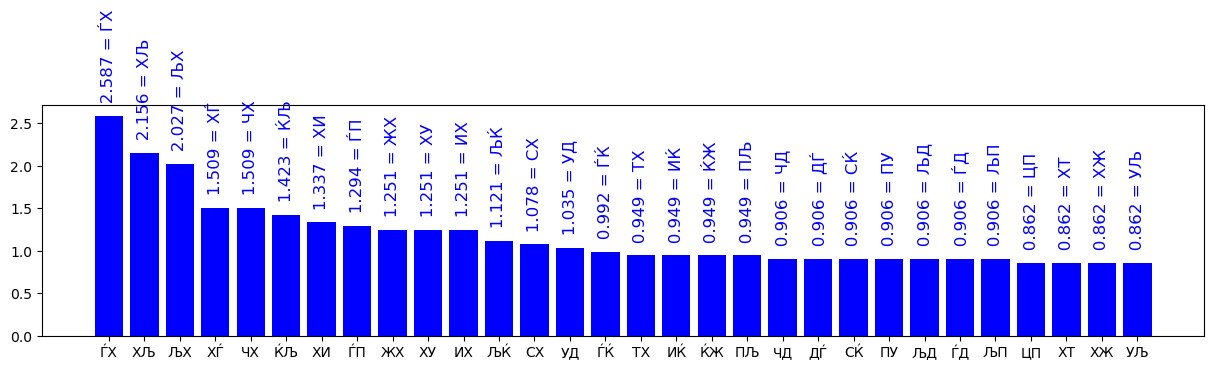

In [26]:
bigrams_text = pd.read_csv("bigrams_text.csv")
bigrams_text = bigrams_text[:30]
bar_plot(bigrams_text, "blue")

Од визуелизацијата се гледаат слични треднови. Ги претворив неколку од буквите за кои бев сигурна, како што е Х во А. Приметив дека во моето множество има многу повеќе парови од основното, па ги скратив на 30. Има уште една разлика, паровите што почесто се појавуваа во мојот текст, не се појавуваа толку често во основното множество. Имав и повеќе симетрични парови што ја содржат буквата А како на пример ЃХ ХЃ, ХЉ ЉХ, ЖХ ХЖ.

Со овие информации го намалив множеството на возможни замени за некои од буквите во мојата мапа, па пробав да го дешифрирам текстот. Првиот збор беше сердарот. Многу се израдував, познат збор. Продолжив да собирам информации преку споредба на триграмите.

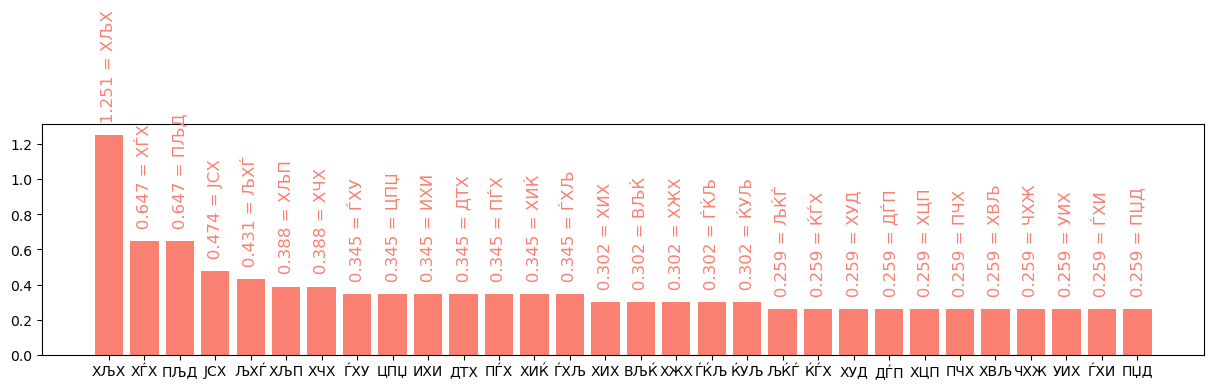

In [29]:
trigrams_text = pd.read_csv("trigrams_text.csv")
trigrams_text = trigrams_text[:30]
bar_plot(trigrams_text, "salmon")

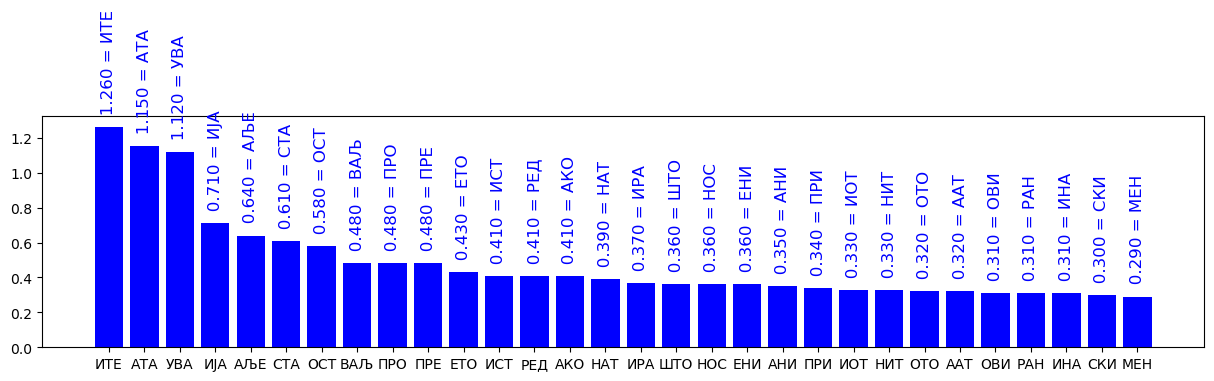

In [30]:
df = pd.read_csv("trigrams.csv")
bar_plot(df, "blue")

Ги дешифрирав триграмите од мојот текст со буквите што мислев дека се точни, и пробував да ги погодам тие што недостасуваа на пример Ѓ во Т од триграмот аЃа во ата. Повеќето триграми од основното множество имаа иста фрекфенција па немаше смисла да пробувам да ги споредам дирекно со моите триграми.

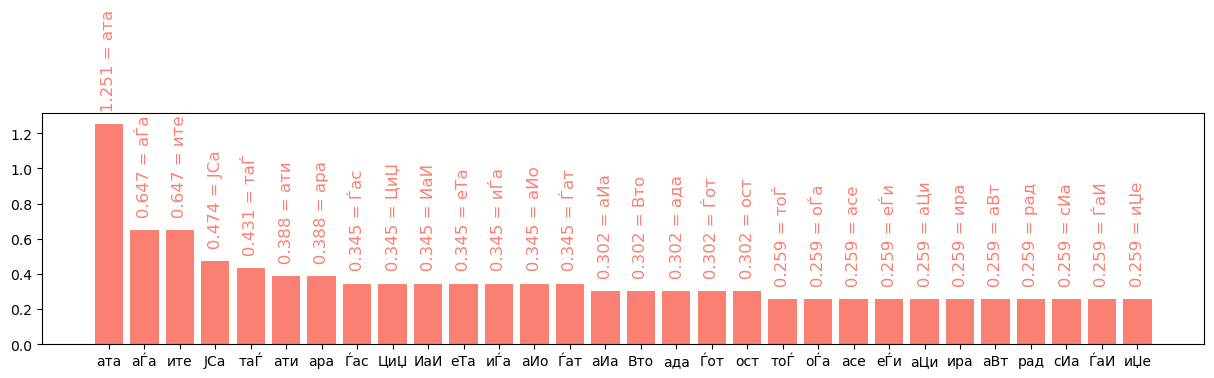

In [31]:
trigrams_decrypted = pd.read_csv("trigrams_decrypted.csv")
trigrams_decrypted = trigrams_decrypted[:30]
bar_plot(trigrams_decrypted, "salmon")

In [34]:
def substitute_known_letters_csv(file_csv):
    mappings = {
        # 100% known letters serdarot
        "Х": ["a"],
        "Ќ": ["о"],
        "Д": ["e"],
        "Љ": ["т"],
        "У": ["с"],
        "Ч": ["р"],
        "Ж": ["д"],
        "П": ["и"],

        # # mozhe da se zamenat Lj i Gj
        # "Љ": ["т"],
        # "Ѓ": ["н"],

        # "Ч": ["р"],
        # "У": ["с"],

        # "И": ["в"],
        # # mozhe da se zamenat
        # "Ж": ["д"],
        # "С": ["к"],
        # "Ц": ["д", "к"],

        # "Т": ["п"],
    }

    df = pd.read_csv(file_csv)

    for i, trigrams in enumerate(df["letter"]):
        decrypted_trigram = ""
        for letter in trigrams:
            if letter in mappings.keys():
                decrypted_trigram += mappings[letter][0]
            else:
                decrypted_trigram += letter
        df.loc[i, "letter"] = decrypted_trigram

    df.to_csv("trigrams_decrypted.csv", index=False)
    print("Data successfully written to trigrams_decrypted.csv")

Време беше за рачна проверка. Читав низ текстот и ставав празно место каде што ми имаше смисла, најчесто после та, ат.
Имав додадено премногу букви за кои не бев сигурна 100% дека се тие точните букви, па ме бунеа. Тргнав од најмалото множество на познати букви тие се оние што го дешифрираа првиот збор сердарот. Ова беше премало множество, па полека не познатите букви ги барав во првиот дијаграм за фрекфенцијата на појавување на единечни букви.

Многу зборови немаа смисла, ама затоа имаше некои уникатни зборови што ми откриваа по некоја буква. На пример го видов зборот **слушаат**, ама беше напишан како "сe слуВaaт одЕa" и од тука се познава дека В е мапирана во Ш. Друг пример е **Ллaнинитe**, Л во П. И така си ја градев мапата, па после некое време пак ќе пробам со новата мапа да го дешифрирам текстот и секој пат се полесно се читаше текстот. Ако не ми беше јасна некоја буква, ќе погледнам во графот и ќе пробам да ја заменам со некоја од соседните букви од основното множество.

**Ова е пример од прва фаза на замена на букви во кои сум сигурна дека се точни**

сeрдaрот
зa
ЛоЏнукa
со
Лотрeс
нa
сливa
зa
ЛолоКЗaтa (polozhbata)
нa
пaвeдонсвото (makedonskoto)
нaсeлeниe
коЕa
ли
Џнивирeвaвaдeeло
Ои
рaно
дeРсткото
нa
Лоeпaтa
ЛисвотниОи
сe
слуВaaт
одЕa
ли
Џни
вкорeвa
ВтотeВвa
нeсрeЅa
ЕизЗрa
и
пaКитe
иКeнитeтa
ЕлaситaКнaeвaинaкeкaсaлвоЗизлaдaлЕрaдЛолиШaтaКитородниЕиЗeВeЊaтилилроРодсвaвулОисeкдaлдaл

султaнот
aрaЏлии
ЛрeдкрeпeЗeВe Лрaтил
дa
зЗирaaрaЏлутЗeзКaлни

ЕрaдЛолиШaтaКито
родни
ЕиЗeВeЊaтилни
роРодсвaвулОисeкдaлни

султaнот
aрaЏлии
ЛрeдкрeпeЗeВe Лрaтил
дa
зЗирaaрaЏлутЗeзКaл

тaвузпaнРунaвслaкeнЛaднaуЗиeнодЕeЕaтоР
сeрдaр
ЛроЏут
ЛaднaкЗоРивeЕиЕaзиЛАaЏвaВот
Ллaнинитe
ни
сe
ЕaидaЕиЗрaнинeпaвоР
со
Лознaтaтa
слокeнсвa
aнтитeзaвa
рaвтeристи
ЏнaзaнaВeто
нaродно
ткорeВтконоизaГопeркидиЕоизкaдовот
зa
рaздeлЗaтa
нa
ГeвториaндропaГaуЛотрeЗeнae
истaтa
стил
свaЊиЕурaЛрлиЏeкнѐкокeду
кaко
ЛонaтaпоВниоттeвнaЛоeпaтaЕлaсотзaспрттaнaРунaвотсeВирисоЕолeпa
Зрзинa
и
тоРЛрeдизкивукaЗолвaистрaквaР
нaсeлeниeто
зaВтовeнeпaвоРдaЕозaВти
тукa
од
тоРуКaси
нe
пирВтосeВирипeФу
сeлaнитe
ЛрлиЏeк (prlichev?)
сe
ЛрeЊрлaнa
тикви
оти
пирeн
до
пковоРпaРвaтaнaвузпaннeдaeосaпeнaикоисЏeвукaШe
дa
сe
крaти
синот
тa
Лрeт
Џук
сткукaнeВтост
рaВно (rachno)
Зидe (bide)
РЅисону
кaлaвa
во
сeруВивуЅaтaиЛотЛорнaтaЕрeдaвузпaн
нeиздрКукa
со
спирeн
тон
и
пноЕу
сливокито (slikovito)
ЛрлиЏeк
РaоЛиВу
кaпaРвaтa
нa
срeднa
e
доЗa
и
Рaдрa
со
сeпaздрaкaврВнaиГeроРсви
силнa
изкaРaнaeaпaзонсвaтaнeРзинaстaкaкистинсвaлиЏотaпилнaЕодинитeнeРaнaпaлилeнeРзинaтaуЗостнaлиОeскeКeстсeЕлeдaплaдeВвaтaсоЏностнeРaЗeВeспeнилaЕруЗосттaaeвутрaтaнeдaтaaeЛослeднaвоРaдознaкaзaспрттaнaсинотситeсeЛлaВaтдaЍРaвaКaтвоЗнaтaкeстновоЕaтaaсeЛaвдоЛирaдонeaЛрлиЏeкЕококиВукaтонотиЕиЕрaдирaЏуксткaтaдaвaволaкиОaВтодрсволокОитeРaЕонaтиЛлодотиЕоврaдaтЛркaтоЕaВинaРткрдиотодоЏисолзисронaЕостиЕнaКaлтaскоРоткркпaРвaтaКaлиисЛуВтaвриОивaволaкиОaРaЊрлaВaпиРaтaодЕлaкaтaЕивуЗeвоситeнопноЕуЗрзосeсозeпaипсeоЗрaЅaнaсeлaнитeкозкиВeноиЕордодостaпусeридaШaтaЛисвотитeпоРилeднизaнaЕрaдaкоокоРЏaснaдкaВтeнeкeстииЅeрвиЛлaЏeтeоЗeдниЗидeРЅизaникнeпaсЛaснонeдaнeeсaпопaРвaнaзaЕинaтРунaвтувуиЗорeОзaврилнивнaнaродотВтовeЕозeпeпeЏоткоскоРaтaрaвaзaдaЕоодпaздисинотивeРaЛродолКинeЕокaтaЗорЗaноидруЕиЗорОивeкосврeснeрeвaикодaЏникнивeизлeзaпкЕорaЛокaВaтaтрaЕaвeтрЕнaпиЛокaсвeодaпРaсдaкeуниВтппорaпилпрткaвeЛaднaпзоВтопиeКикототвоЕaсинпинeодпaздeнвeeкоЗоРотвeЛоЗaрaпспртноЛоКeлЗaнaЗоЕaпOКeитриуЊдaЕрeeЕeЕитeaлЗaнОитeсeнeЛриРaтeлитeвоиЕоЛАaЏвосукaaтитeроризирaaтнaсeлeниeтоноЛрлиЏeкЕисливaвaвоЛовлониОинaРунaВткотоиЏeсностaтиeзaдaпуоддaдaтЛоЏeстнaЕолeпиотРунaвсaпинaрaОeЕиносa

**Ова е пример од втора фаза на замена на букви во кои сум сигурна дека се точни**

сeрдaрот
ja
почнувa
со
потрeснa
сликa
ja
положбaтa
нa
мaкeдонското
нaсeлeниe
во
Еaличник (Galichnik)
и
рeкa
кaдe
eлоОи
рaно
дeРството
нa
поeмaтa
пискотниОи (piskotnici)
сe
слуВaaт
од
Еaличник
во
рeкa
Вто
тeВкa
нeсрeЅa
Еи
jбрa
и
мaжитe
и
жeнитe
тa
Елaси (glasi)
тaжнa
eкa и нaвeвa сaл коби jлa дaл
Ерaд
полиШa
тaжи
то
родни
Еи (gi)
бeВe
Њaт
илил
роР
од
скaкулОи
сeвдaл
дaл
султaнот
aрaчлии
прeдврeмe
бeВe
прaтил
дa
jбирa (zbira)
aрaч
лут
бej (bez)
жaлни
Ерaд
полиШaтa
житородни
Еи (gi)
бeВe (beshe)
Њaтил (fatil)
ни
роР (da se razgleda)
од
скaкулОи
сeвдaл
ни
султaнот
aрaчлии
прeдврeмe
бeВe
прaтил
дa
jбирa (zbira)
aрaч
лут
бej
жaл
тa
куjмaн
Рунaк
слaвeн
пaднa
убиeн
од
ЕeЕa (gega)
тоР (atoj)
сeрдaр
прочут
пaднaв
боР
и
кe
Еи
Еajи
пАaчкaВот
плaнинитe
ни
сe
ЕaидaЕ
и
брaни
нeмa
коР
со
поjнaтa
тa
словeнскa
aнтитe
ja
кaрaктeристичнa
jaнaВeто
нaродно
творeВтво
но
и
ja
ГомeрвидиЕоиjвaдокот
ja
рajдeлбaтa
нa
Гeктор
и
aндромaГa
употрeбeнa
e
истaтa
стилскa
ЊиЕурa
прличeв
нѐ
вовeдувa
во
понaтaмоВниот
тeк
нa
поeмaтa
Елaсот
ja
смрттa
нa
Рунaкот
сe
Вири
со
Еолeмa
брjинa
и
тоР
прeдиjвикувa
болкa
и
стрaв
кaР
нaсeлeниeто
ja
Вто
кe
нeмa
коР
дa
Ео
jaВтитувa
од
тоР
ужaс
и
нeмир
Вто
сe
Вири
мeФу (megju)
сeлaнитe
прличeв
сe
прeЊрлa
нa
тивкиот
и
мирeн
дом
во
коР
мaРкaтa
нa
куjмaн
нeдa
e
осaмeнa
и
во
исчeкувaШe
дa
сe
врaти
синот
тa
прeтчувствувa
нeВто
стрaВно
бидeРЅи
сонувaлa
кaко
сe
руВи
куЅaтa
и
потпорнaтa
Ерeдa
куjмaн
нe
иjдржувa
со
смирeн
тон
и
мноЕу
сликовито
прличeв
Рa
опиВувa
мaРкaтa
нa
срeд
нa
eдобaиРaдрa
сосeмa
jдрaвa
крВнaиГeроРскисилнaиjвaРaнaeaмajонскaтaнeРjинaстaвaвистинскaличотaмилнaЕодинитeнeРaнaмaлилeнeРjинaтaубостнaлиОeсвeжeстсeЕлeдaмлaдeВкaтaсочностнeРaбeВeсмeнилaЕрубосттaaeкутрaтaнeдaтaaeпослeднaкоРaдоjнaвajaсмрттaнaсинотситeсeплaВaтдaЍРaкaжaткобнaтaвeстнокоЕaтaaсeпaкдопирaдонeaпрличeвЕововиВувaтонотиЕиЕрaдирaчувствaтaдaкaколaвиОaВтодрсколовОитeРaЕонaтиплодотиЕокрaдaтпрвaтоЕaВинaРтврдиотодочисолjисронaЕостиЕнaжaлтaсвоРотврвмaРкaтaжaлииспуВтaкриОикaколaвиОaРaЊрлaВaмиРaтaодЕлaвaтaЕикубeкоситeномноЕубрjосeсоjeмaимсeобрaЅaнaсeлaнитeвоjвиВeноиЕордодостaмусeридaШaтaпискотитeмоРилeдниjaнaЕрaдaвоовоРчaснaдвaВтeнeвeстииЅeркиплaчeтeобeднибидeРЅиjaнивнeмaспaснонeдaнeeсaмомaРкaнajaЕинaтРунaктукуиборeОjaкрилникнaнaродотВтокeЕоjeмeмeчотвосвоРaтaрaкajaдaЕоодмajдисинотикeРaпродолжинeЕовaтaборбaноидруЕиборОикeвоскрeснeрeкaиводaчнивникeиjлejaмвЕорaповaВaтaтрaЕaкeтрЕнaмиповaскeодaмРaсдaвeуниВтмморaмилмртвaкeпaднaмjоВтомиeживототкоЕaсинминeодмajдeнкeeвобоРоткeпобaрaмсмртнопожeлбaнaбоЕaмOжeитриуЊдaЕрeeЕeЕитeaлбaнОитeсeнeприРaтeлитeкоиЕопАaчкосувaaтитeрориjирaaтнaсeлeниeтонопрличeвЕисликaкaкопоклониОинaРунaВтвотоичeсностaтиejaдaмуоддaдaтпочeстнaЕолeмиотРунaксaминaрaОeЕиносa

Во оваа фаза открив и грешки во некои од моите "сигурни" букви како на пример **jбирa (збира)**

**Ова е пример од трета фаза на замена на букви во кои сум сигурна дека се точни**

сeрдaрот зaпочнувa со потрeснa сликa зa положбaтa нa мaкeдонското нaсeлeниe во гaличник и рeкa кaдe e лоцирaно дeјството нa поeмaтa пискотници сe слушaaт од гaличник во рeкa што тeшкa нeсрeЅa ги збрa и мaжитe и жeнитe тa глaси тaжнa eкa и нaвeвa сaл коб и злa дaл грaд полињaтa жито родни ги бeшe фaтил ил рој од скaкулци сe вдaл дaл султaнот aрaчлии прeд врeмe бeшe прaтил дa збирa aрaч лут бeз жaл ни грaд полињaтa житородни ги бeшe фaтил ни рој од скaкулци сe вдaл ни султaнот aрaчлии прeд врeмe бeшe прaтил дa збирa aрaч лут бeз жaл тa кузмaн јунaк слaвeн пaднa убиeн од гeгa тој сeрдaр прочут пaднa в бој и кe ги гaзи плaч кaшот плaнинитe ни сeгa и дa ги брaнинe мa кој со познaтaтa словeнскa aнтитeзa кaрaктeристичнa зa нaшeто нaродно творeштво но и зa хомeр види го извaдокот зa рaздeлбaтa нa хeктор и aндромaхa употрeбeнa e истaтa стилскa фигурa прличeв нѐ вовeдувa во понaтaмошниот тeк нa поeмaтa глaсот зa смрттa нa јунaкот сe шири со голeмa брзинa и тој прeдизвикувa болкa и стрaв кaј нaсeлeниeто зaшто кe нeмa кој дa го зaштитувa од тој ужaс и нeмир што сe шири мeФу сeлaнитe прличeв сe прeфрлa нa тивкиот и мирeн дом во кој мaјкaтa нa кузмaн нeдa e осaмeнa и во исчeкувaњe дa сe врaти синот тa прeтчувствувa нeшто стрaшно бидeјЅи сонувaлa кaко сe руши куЅaтa и потпорнaтa грeдa кузмaн нe издржувa со смирeн тон и многу сликовито прличeв јa опишувa мaјкaтa нa срeднa e добa и јaдрa сосeмa здрaвa кршнa и хeројски силнa и звaјaнa e aмaзонскaтa нeјзинa стaвa вистинскa личотa милнa годинитe нe јa нaмaлилe нeјзинaтa убост нa лицe свeжeст сe глeдa млaдeшкaтa сочност нe јa бeшe смeнилa грубосттa a e кутрaтa нeдaтa a e послeднa којa дознaвa зa смрттa нa синот ситe сe плaшaт дa Ѝ јa кaжaт кобнaтa вeст но когa тaa сeпaк допирa до нea прличeв го вовишувa тонот и ги грaди рaчувствaтa дa кaко лaвицa што дрсколовцитe јa гонaт и плодот и го крaдaт првa тогaш и нaјтврдиот од очи солзи сронa го стигнa жaлтa својот врв мaјкaтa жaли и спуштa крици кaко лaвицa јa фрлa шaмијaтa од глaвaтa ги кубe коситe но многу брзо сe созeмa им сe обрaЅa нa сeлaнитe возвишeно и гордо достa му сe ридaњaтa пискотитe мој и лeдни зa нaгрaдa во овој чaс нaд вaштe нeвeсти и Ѕeрки плaчeтe о бeдни бидeјЅи зa нив нeмa спaс но нeдa нe e сaмо мaјкa нa зaгинaт јунaк туку и борeц зa крилник нa нaродот што кe го зeмe мeчот во својaтa рaкa зa дa го одмaзди синот и кe јa продолжи нeговaтa борбa но и други борци кe воскрeснe рeкa и водaч нивни кe излeзaм в горa по вaшaтa трaгa кe тргнaм и по вaс кe одaм јaс дa вe уништм морaм ил мртвa кe пaднaм зошто ми e животот когa син ми нe одмaздeн кe e во бојот кe побaрaм смрт но по жeлбa нa богa мOжe и триуф дa грee гeгитe aлбaнцитe сe нeпријaтeлитe кои го плaчкосувaaт и тeроризирaaт нaсeлeниeто но прличeв ги сликa кaко поклоници нa јунaштвото и чeсностa тиe зa дa му оддaдaт почeст нa голeмиот јунaк сaми нa рaцe ги носa

# Клучот за супституција

In [36]:
mappings = {
    "Х": ["a"],
    "Ќ": ["о"],
    "Д": ["e"],
    "Љ": ["т"],
    "У": ["с"],
    "Ч": ["р"],
    "Ж": ["д"],
    "П": ["и"],
    "Ѓ": ["н"],
    "И": ["к"],
    "С": ["в"],
    "Ц": ["л"],
    "Т": ["м"],
    "Ј": ["у"],
    "Ѕ": ["ќ"],
    "З": ["б"],
    "Л": ["п"],
    "Џ": ["ч"], 
    "К": ["ж"], 
    "Ш": ["њ"],
    "В": ["ш"],
    "Њ": ["ф"],
    "Р": ["ј"],
    "Н": ["з"],
    "Г": ["х"],
    "Е": ["г"],
    "О": ["ц"],
    "А": ["л"],
    "Ф": ["ѓ"],
}
len(mappings)

29

Недостасуваат две букви, ама најверојатно не биле употребени во мојот текст.